In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Derivación

Empezamos con la definición básica de derivación para una función de una dola variable.

$$
\frac{df(x)}{dx} \equiv {\rm lim}_{h\to 0} \frac{f(x+h)-f(x)}{h}
$$

Donde tenemos la función $f(x)$ calculada sobre una serie discreta de puntos $x_i$. En este caso hay dos formas de calcular la derivada

## Diferencia hacia adelante (Forward difference)

Este esquema utiliza la expansión en serie de Taylor alrededor de $f(x+h)$

$$
f(x+h) = f(x) + h\frac{df}{dx} + \frac{h^2}{2!}\frac{d^2f}{dx^2}+\cdots
$$

despreciando los términos de segundo orden podemos escribir

$$
\frac{df}{dx} \approx \frac{f(x+h) - f(x)}{h}
$$

In [2]:
def my_func(x):
    return np.exp(-(x**2))
def my_func_prime(x):
    return -2*x * np.exp(-(x**2))

0.00100010001


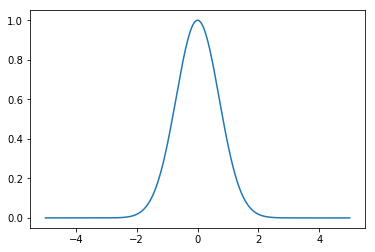

In [3]:
n_points = 10000
x = np.linspace(-5.0,5.0,n_points)
h = x[1]-x[0]

print(h)

f = my_func(x)
plt.plot(x,f)

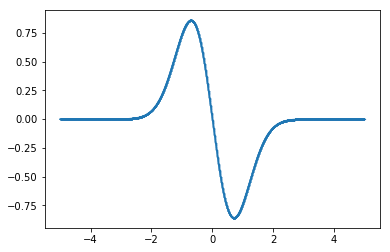

In [4]:
f_prime_diff = (f[1:] - f[0:-1])/h
f_prime_true = my_func_prime(x[0:-1])
plt.scatter(x[0:-1], f_prime_diff,s=0.1)
plt.plot(x[0:-1], f_prime_true)

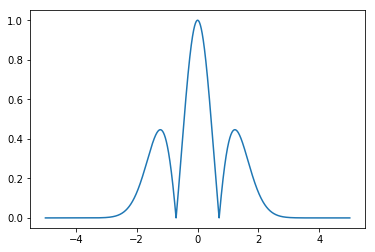

In [5]:
plt.plot(x[0:-1], abs(f_prime_true-f_prime_diff)/h)

## Diferencia central

Un algoritmo con mayor precisión es el de diferencia central

$$
\frac{df}{dx}\approx \frac{f(x+h) - f(x-h)}{2h}
$$

0.00100010001


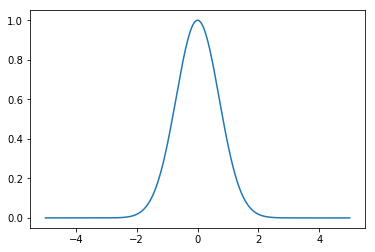

In [6]:
n_points = 10000
x = np.linspace(-5.0,5.0,n_points)
h = x[1]-x[0]
print(h)
f = my_func(x)
plt.plot(x,f)

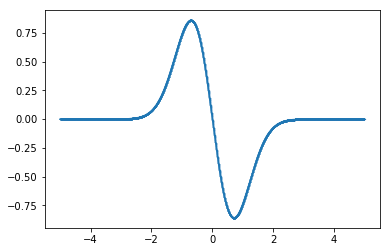

In [7]:
f_prime_diff = (f[2:-1] - f[0:-3])/(2*h)
f_prime_true = my_func_prime(x[1:-2])
plt.scatter(x[1:-2], f_prime_diff,s=0.1)
plt.plot(x[1:-2], f_prime_true)

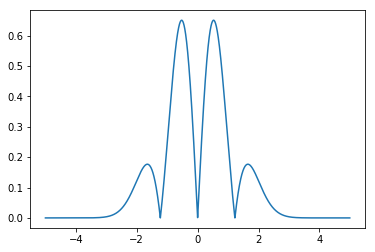

In [8]:
plt.plot(x[1:-2], abs(f_prime_true-f_prime_diff)/(h*h))

## Segunda derivada

Se puede utilizar también este esquema para estimar la segunda derivada

$$
\frac{d^2f}{dx^2} \approx \frac{f^{\prime}(x+h/2) - f^{\prime}(x-h/2)}{h}\approx \frac{f(x+h) - 2f(x) + f(x-h)}{h^2}
$$

In [9]:
def my_func(x):
    return np.sin(x)
def my_func_prime_prime(x):
    return -np.sin(x)

0.00157095342214


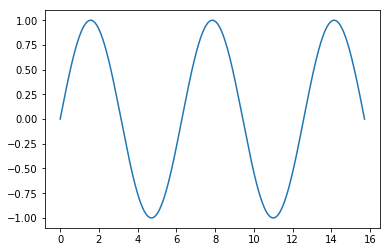

In [10]:
n_points = 10000
x = np.linspace(0,5.0*np.pi,n_points)
h = x[1]-x[0]
print(h)
f = my_func(x)
plt.plot(x,f)

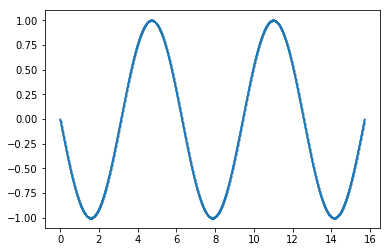

In [11]:
f_prime_prime_diff = (f[2:-1] -2*f[1:-2] + f[0:-3])/(h**2)
f_prime_prime_true = my_func_prime_prime(x[1:-2])
plt.scatter(x[1:-2], f_prime_prime_diff,s=0.1)
plt.plot(x[1:-2], f_prime_prime_true)

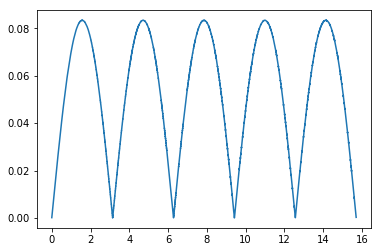

In [12]:
plt.plot(x[1:-2], abs(f_prime_prime_true-f_prime_prime_diff)/(h*h))

# Diferencia extrapolada

Los esquemas de diferenciación se basan en conservar un cierto número de términos en la expansión de Taylor. Estos errores se pueden se pueden disminuir aún más con una combinación adecuada de términos. 

Uno de ellos es la aproximación de diferencia central usando pasos de $h/4$

$$
\frac{df(x)}{dx}  \approx D_{dc}(x,h/2)\equiv \frac{f(x+h/4) - f(x - h/4)}{h/2}
$$

que se puede utilizar a su vez para escribir una mejor aproximación

$$
\frac{df(x)}{dx} \approx \frac{4D_{dc}(x,h/2) - D_{dc}(x,h)}{3}
$$

In [13]:
def my_func(x):
    return np.sin(x)
def my_func_prime(x):
    return np.cos(x)

0.128228271575


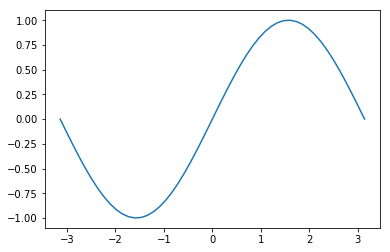

In [14]:
n_points = 50
x = np.linspace(-np.pi,np.pi,n_points)
h = x[1]-x[0]
f = my_func(x)
print(h)
plt.plot(x,f)

In [15]:
f_prime_da = (f[1:] - f[0:-1])/h
f_prime_dc_h = (f[2:-1] - f[0:-3])/(2*h)
f_prime_dc_2h = (f[4:-1] - f[0:-5])/(4*h)
f_prime_de = (1.0/3.0) * (4.0 * f_prime_dc_h[1:-1] - f_prime_dc_2h)


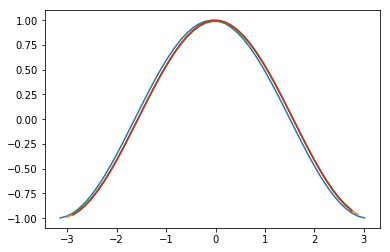

In [16]:
plt.plot(x[0:-1], f_prime_da)
plt.plot(x[1:-2], f_prime_dc_h)
plt.plot(x[2:-3], f_prime_dc_2h)
plt.plot(x[2:-3], f_prime_de)

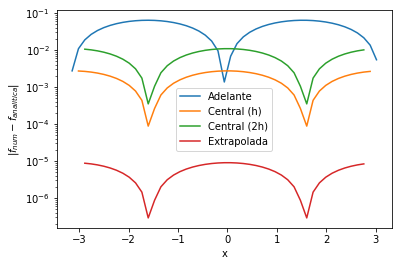

In [17]:
plt.plot(x[0:-1], np.abs(f_prime_da - my_func_prime(x[0:-1])), label='Adelante')
plt.plot(x[1:-2], np.abs(f_prime_dc_h - my_func_prime(x[1:-2])), label='Central (h)')
plt.plot(x[2:-3], np.abs(f_prime_dc_2h - my_func_prime(x[2:-3])), label='Central (2h)')
plt.plot(x[2:-3], np.abs(f_prime_de - my_func_prime(x[2:-3])), label='Extrapolada')


plt.yscale('log')
plt.xlabel('x')
plt.ylabel('$|f_{num} - f_{analitica}|$')
plt.legend()